In [5]:
import pandas as pd
df = pd.read_csv('D:\\UEH\\Năm 2.1\\Cấu trúc CSDL\\Airlines Reviews and Rating.csv')
print(df.head())



  Aircraft Type                                      Users Reviews  \
0           NaN  ✅Trip Verified|  Cancelled our flight last-min...   
1           NaN  ✅Trip Verified| I had a flight from Miami, Flo...   
2           NaN  ✅Trip Verified|  We started our day with BA in...   
3           NaN  ✅Trip Verified|  I fly British Airways weekly ...   
4           NaN  Not Verified|  Everything was ok until our con...   

          Country Type_of_Travellers                                Route  \
0  United Kingdom     Couple Leisure             London Heathrow to Tokyo   
1   United States       Solo Leisure  Miami to Dublin via London Heathrow   
2   United States           Business   Prague to San Francisco via London   
3  United Kingdom           Business                    London to Glasgow   
4          France     Family Leisure   San Diego to Marseille via London    

       Seat_Types  Seat Comfort Date Flown  Cabin Staff Service  \
0   Economy Class           1.0     23-Sep       

In [7]:
# Lọc dữ liệu cho hãng A320
df_a320 = df[df['Aircraft Type'] == 'A320']  # Thay 'A320' bằng tên chính xác của hãng trong dataset

# Hiển thị số lượng đánh giá
print(f"Số lượng đánh giá cho hãng A320: {len(df_a320)}")

Số lượng đánh giá cho hãng A320: 352


In [13]:
pip install textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 626.3/626.3 kB 5.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [9]:
print("Tên các cột trong DataFrame:")
print(df.columns)

Tên các cột trong DataFrame:
Index(['Aircraft Type', 'Users Reviews', 'Country', 'Type_of_Travellers',
       'Route', 'Seat_Types', 'Seat Comfort', 'Date Flown',
       'Cabin Staff Service', 'Ground Service', 'Food & Beverages',
       'Wifi & Connectivity', 'Inflight Entertainment', 'Value For Money',
       'Recommended'],
      dtype='object')


In [23]:
df.columns = df.columns.str.strip()

# Kiểm tra xem cột 'User Reviews' có tồn tại hay không
if 'User Reviews' in df.columns:
    print("Cột 'User Reviews' tồn tại.")
else:
    print("Cột 'User Reviews' không tồn tại. Kiểm tra lại tên cột.")
    # In ra tất cả các cột để xác định tên đúng
    print("Tên cột khả dụng:")
    print(df.columns)
    # Nếu cần, đổi tên cột ở đây, ví dụ:
    df.rename(columns={'Users Reviews': 'User_Reviews'}, inplace=True)

# Bước 3: Lọc dữ liệu cho hãng A320
df_a320 = df[df['Aircraft Type'] == 'A320'].copy()

Cột 'User Reviews' không tồn tại. Kiểm tra lại tên cột.
Tên cột khả dụng:
Index(['Aircraft Type', 'Users Reviews', 'Country', 'Type_of_Travellers',
       'Route', 'Seat_Types', 'Seat Comfort', 'Date Flown',
       'Cabin Staff Service', 'Ground Service', 'Food & Beverages',
       'Wifi & Connectivity', 'Inflight Entertainment', 'Value For Money',
       'Recommended'],
      dtype='object')


In [17]:
df_a320 = pd.read_csv('D:\\UEH\\Năm 2.1\\Cấu trúc CSDL\\Airlines Reviews and Rating.csv')

In [25]:
from textblob import TextBlob

# Định nghĩa hàm phân tích cảm xúc
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Áp dụng hàm phân tích cảm xúc cho cột 'User_Reviews'
df_a320['sentiment_polarity'] = df_a320['User_Reviews'].apply(analyze_sentiment)

# Hiển thị một số giá trị sentiment
print(df_a320[['User_Reviews', 'sentiment_polarity']].head())

                                         User_Reviews  sentiment_polarity
7   ✅Trip Verified| Check in and security clearanc...            0.275099
12  Not Verified|  Flight cancelled, no crew! 9th ...           -0.204167
14  ✅Trip Verified|  4/4 flights we booked this ho...           -0.033333
23  ✅Trip Verified|  I flew London to Malaga on 27...           -0.025521
25  ✅Trip Verified|  Filthy plane, cabin staff ok,...           -0.125000


In [27]:
# Định nghĩa nhãn cho cảm xúc
df_a320['sentiment'] = df_a320['sentiment_polarity'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

# Kiểm tra số lượng từng nhóm
print(df_a320['sentiment'].value_counts())

sentiment
Positive    256
Negative     96
Name: count, dtype: int64


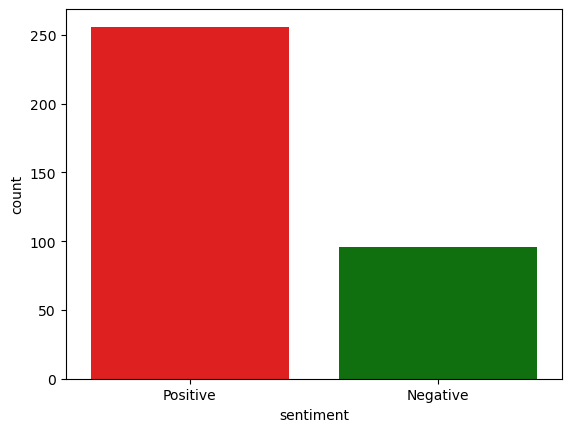

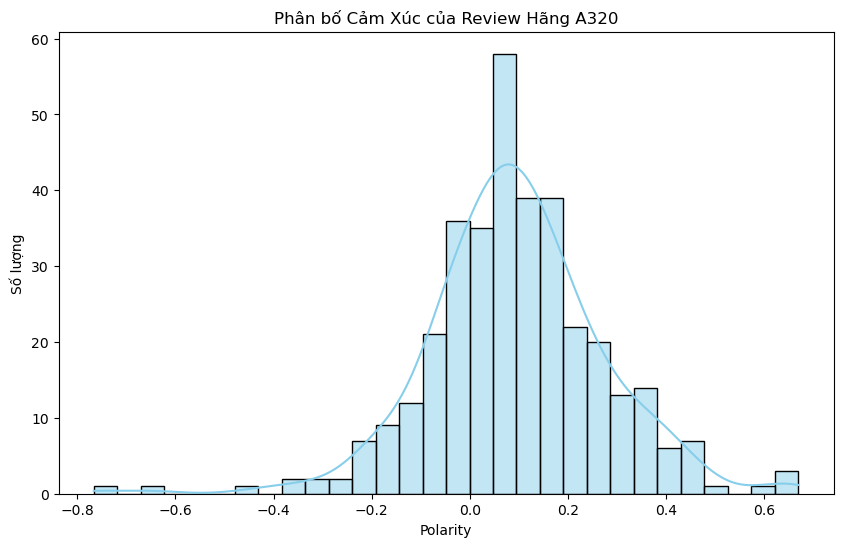

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns

# Vẽ biểu đồ đếm số lượng 'sentiment'
sns.countplot(x='sentiment', data=df_a320, palette=['red', 'green'], hue='sentiment', legend=False)

# Hiển thị biểu đồ
import matplotlib.pyplot as plt
plt.show()
# Biểu đồ phân bố cảm xúc
plt.figure(figsize=(10,6))
sns.histplot(df_a320['sentiment_polarity'], bins=30, kde=True, color='skyblue')
plt.title('Phân bố Cảm Xúc của Review Hãng A320')
plt.xlabel('Polarity')
plt.ylabel('Số lượng')
plt.show()



In [40]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


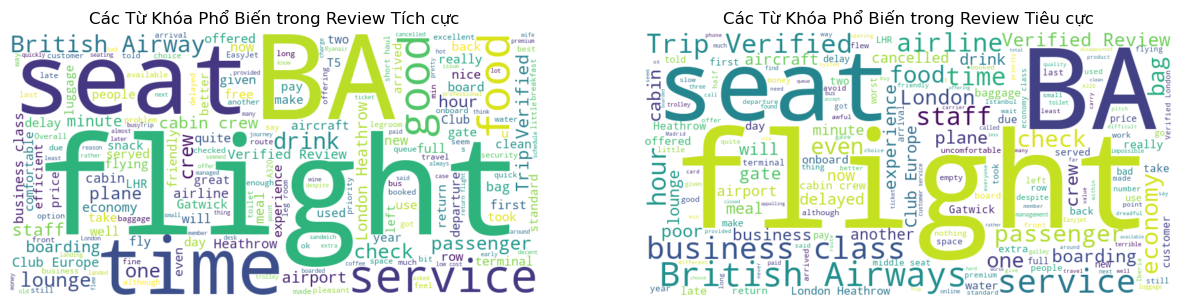

In [44]:
from wordcloud import WordCloud

# Tách các review theo nhóm cảm xúc
positive_reviews = ' '.join(df_a320[df_a320['sentiment'] == 'Positive']['User_Reviews'].dropna())
negative_reviews = ' '.join(df_a320[df_a320['sentiment'] == 'Negative']['User_Reviews'].dropna())

# Tạo WordCloud cho nhóm tích cực
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

# Tạo WordCloud cho nhóm tiêu cực
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

# Hiển thị WordCloud
plt.figure(figsize=(15,7))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Các Từ Khóa Phổ Biến trong Review Tích cực')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Các Từ Khóa Phổ Biến trong Review Tiêu cực')
plt.axis('off')

plt.show()

In [48]:
from collections import Counter
import re
import nltk  # Thêm import NLTK

def clean_text(text):
    # Loại bỏ ký tự đặc biệt và chuyển về chữ thường
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    text = text.lower()
    return text

# Làm sạch văn bản
df_a320['cleaned_review'] = df_a320['User_Reviews'].apply(clean_text)

# Đếm từ khóa trong từng nhóm
positive_words = ' '.join(df_a320[df_a320['sentiment'] == 'Positive']['cleaned_review']).split()
negative_words = ' '.join(df_a320[df_a320['sentiment'] == 'Negative']['cleaned_review']).split()

# Loại bỏ từ dừng (stopwords)
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

positive_words = [word for word in positive_words if word not in stop_words]
negative_words = [word for word in negative_words if word not in stop_words]

# Đếm tần suất
positive_counter = Counter(positive_words)
negative_counter = Counter(negative_words)

# Hiển thị 10 từ phổ biến nhất trong mỗi nhóm
print("Top 10 từ phổ biến trong nhóm Tích cực:")
print(positive_counter.most_common(10))

print("\nTop 10 từ phổ biến trong nhóm Tiêu cực:")
print(negative_counter.most_common(10))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...


Top 10 từ phổ biến trong nhóm Tích cực:
[('flight', 482), ('ba', 340), ('service', 202), ('time', 196), ('crew', 195), ('verified', 179), ('good', 166), ('british', 164), ('airways', 163), ('food', 160)]

Top 10 từ phổ biến trong nhóm Tiêu cực:
[('flight', 142), ('ba', 113), ('verified', 76), ('business', 68), ('service', 61), ('class', 61), ('british', 58), ('airways', 58), ('seat', 55), ('london', 53)]


[nltk_data]   Unzipping corpora\stopwords.zip.


In [80]:
print(y.value_counts())

value_binary
0    32
Name: count, dtype: int64


In [90]:
# Thay vì loại bỏ giá trị NaN, bạn có thể thay thế bằng giá trị trung bình
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Kiểm tra phân phối lại
print(y.value_counts())

value_binary
0    32
Name: count, dtype: int64


In [96]:
from sklearn.impute import SimpleImputer

# Thay thế giá trị NaN bằng giá trị trung bình cho các biến độc lập (X)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Kiểm tra lại phân phối các lớp trong y
print(y.value_counts())

value_binary
0    32
Name: count, dtype: int64


In [98]:
# Mã hóa lại biến mục tiêu
df_a320['value_binary'] = df_a320['Value For Money'].apply(lambda x: 1 if x >= 4 else 0)

# Kiểm tra phân phối của 'value_binary' sau khi mã hóa
print(df_a320['value_binary'].value_counts())

value_binary
0    233
1    119
Name: count, dtype: int64


In [112]:
#Cách 2: Xem xét lại quy trình tiền xử lý
#Nếu cách 1 vẫn không giải quyết được vấn đề, có thể số lượng mẫu trong một lớp là quá ít để SMOTE có thể hoạt động hiệu quả. Bạn nên xem xét lại dữ liệu và kiểm tra phân phối của các lớp sau khi xử lý NaN, hoặc sử dụng các phương pháp khác để cân bằng dữ liệu, như Random Oversampling hoặc Random Undersampling.
#Dưới đây là cách thực hiện Random Oversampling:
from imblearn.over_sampling import RandomOverSampler

# Sử dụng Random Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_imputed, y)

# Chia lại dữ liệu sau khi resampling
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Huấn luyện mô hình Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred = model.predict(X_test)

# Đánh giá độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác của mô hình: {accuracy:.2f}")

# Báo cáo phân loại
print("\nBáo cáo phân loại:")
print(classification_report(y_test, y_pred))

# Ma trận nhầm lẫn
print("\nMa trận nhầm lẫn:")
print(confusion_matrix(y_test, y_pred))

Độ chính xác của mô hình: 1.00

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         5

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11


Ma trận nhầm lẫn:
[[6 0]
 [0 5]]


In [132]:
#Phân Tích Cảm Xúc
#Bạn đã thực hiện bước này bằng cách sử dụng TextBlob để phân tích cảm xúc từ các đánh giá của người dùng. Nếu bạn chưa làm điều này hoặc cần làm lại, hãy đảm bảo rằng bạn đã tạo cột sentiment cho các đánh giá:
from textblob import TextBlob

# Hàm phân tích cảm xúc
def analyze_sentiment(review):
    analysis = TextBlob(review)
    return 'Positive' if analysis.sentiment.polarity > 0 else 'Negative'

# Áp dụng phân tích cảm xúc
df_a320['sentiment'] = df_a320['Users Reviews'].apply(analyze_sentiment)

# Mã hóa cảm xúc thành số
df_a320['sentiment_numeric'] = df_a320['sentiment'].apply(lambda x: 1 if x == 'Positive' else 0)

In [148]:

# Xác Định Các Biến Độc Lập
X = df_a320[['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 
              'Wifi & Connectivity', 'Inflight Entertainment', 'sentiment_numeric']]
# Mã hóa biến mục tiêu
df_a320['value_binary'] = df_a320['Value For Money'].apply(lambda x: 1 if x in ['Good', 'Excellent'] else 0)
# Xử Lý Dữ Liệu Thiếu - Loại bỏ giá trị NaN
X = X.dropna()
y = df_a320['value_binary'][X.index]  # Đảm bảo y khớp với X

#Chia Dữ Liệu
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [152]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.sparse import hstack, csr_matrix

# Giả sử bạn có một cột văn bản (ở đây chắc là cột Reviews) trong DataFrame của mình
df_clean = df_a320.dropna(subset=['Users Reviews'])  # Loại bỏ hàng có giá trị thiếu trong cột văn bản và các đặc trưng khác
text_data = df_clean['Users Reviews']  # Thay thế 'Users Reviews' bằng tên cột chứa văn bản thực tế


In [158]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack, csr_matrix
import pandas as pd
import numpy as np

# Tạo TF-IDF vectorizer
tfidf = TfidfVectorizer()

# Biến đổi văn bản thành vector TF-IDF
X_text = tfidf.fit_transform(text_data)

# Kiểm tra nếu X_imputed là numpy array và chuyển đổi thành DataFrame (nếu cần)
if isinstance(X_imputed, np.ndarray):
    # Nếu bạn không có tên cột, có thể tạo tên giả định như sau
    desired_columns = [f'feature_{i}' for i in range(X_imputed.shape[1])]
    X_imputed = pd.DataFrame(X_imputed, columns=desired_columns)  # Tạo DataFrame từ numpy array

# Lấy các đặc trưng số sau khi loại bỏ giá trị thiếu từ df_clean
X_imputed_clean = df_clean[X_imputed.columns]  # Dựa vào tên cột từ DataFrame X_imputed
X_imputed_sparse = csr_matrix(X_imputed_clean)  # Chuyển thành dạng sparse nếu chưa phải là dạng sparse

# Kết hợp các đặc trưng khác với vector văn bản
X_combined = hstack((X_imputed_sparse, X_text))

# Chuẩn bị nhãn (target variable)
y_clean = df_clean['value_binary']  # Đảm bảo y khớp với số lượng hàng sau khi xử lý


KeyError: "None of [Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',\n       'feature_5'],\n      dtype='object')] are in the [columns]"